In [1]:
########################################################################
#####                   DREAM - MPPC Recording                     #####
########################################################################

In [2]:
##### Import Libraries
import numpy as np
import time
import os
import pickle
import matplotlib.pyplot as plt
import datetime
from mcculw import ul
from ctypes import cast, POINTER, c_double, c_ushort, c_ulong 
from mcculw.enums import (ScanOptions, FunctionType, Status, ChannelType, 
    DigitalPortType, ULRange, TriggerSource, TriggerSensitivity, TriggerEvent, 
    DigitalIODirection, TimerIdleState, PulseOutOptions, TrigType)
from mcculw.device_info import DaqDeviceInfo

try:
    from console_examples_util import config_first_detected_device
except ImportError:
    from console_examples_util import config_first_detected_device

## AQUISITION SETTINGS

In [3]:
DAQ_Rate = 100000 # [Hz]
Exp_Duration = 10 #[s]
total_count = int(DAQ_Rate * Exp_Duration)
EXPNAME = "RANDOM_92_2"

## SETUP DAQ

In [4]:
########################################################
##### SETUP EQUIPMENT

##### Connect to the DAQ Card
board_num = 0
daq_dev_info = DaqDeviceInfo(board_num = 0)

##### Setup DAQ for analog input
ai_info = daq_dev_info.get_ai_info()
ai_range = ai_info.supported_ranges[2]

## Set the scan options
scan_options_AI = ScanOptions.BACKGROUND  | ScanOptions.EXTTRIGGER

In [5]:
## Allocate a buffer for the input

if ai_info.resolution <= 16:
    # Use the win_buf_alloc method for devices with a resolution <= 16
    memhandle_AI = ul.win_buf_alloc(total_count)
    # Convert the memhandle to a ctypes array.
    ctypes_array_AI = cast(memhandle_AI, POINTER(c_ushort))
else:
    # Use the win_buf_alloc_32 method for devices with a resolution > 16
    memhandle_AI = ul.win_buf_alloc_32(total_count)
    # Convert the memhandle to a ctypes array.
    ctypes_array_AI = cast(memhandle_AI, POINTER(c_ulong))

if not memhandle_AI:
    raise Exception('Error: Failed to allocate memory')


## RUN EXPERIMENT

In [6]:
## Start the timer, which will start and pace AO and AI
ul.a_in_scan(board_num, 3, 3, (int (DAQ_Rate*Exp_Duration)), DAQ_Rate, ai_range, memhandle_AI, scan_options_AI)

## Wait until AI Finishes
status, curr_count, curr_index = ul.get_status(board_num, FunctionType.AIFUNCTION)
while status != Status.IDLE:
    time.sleep(0.5)
    status, curr_count, curr_index = ul.get_status(
            board_num, FunctionType.AIFUNCTION)

## READ AND SAVE ANALOG INPUT

In [7]:
points = []
for i in range((int (DAQ_Rate*Exp_Duration))):
    eng_value = ul.to_eng_units(board_num, ai_range, ctypes_array_AI[i])
    points.append(eng_value)
DAQ_signal = np.array(points)

In [8]:
DataFolderName = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/MCC_DAQ/" + datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S') + "_" + str(EXPNAME)
os.makedirs(DataFolderName)
pickle.dump(DAQ_signal, open(DataFolderName + "/MPPCSignal.p", "wb" ))

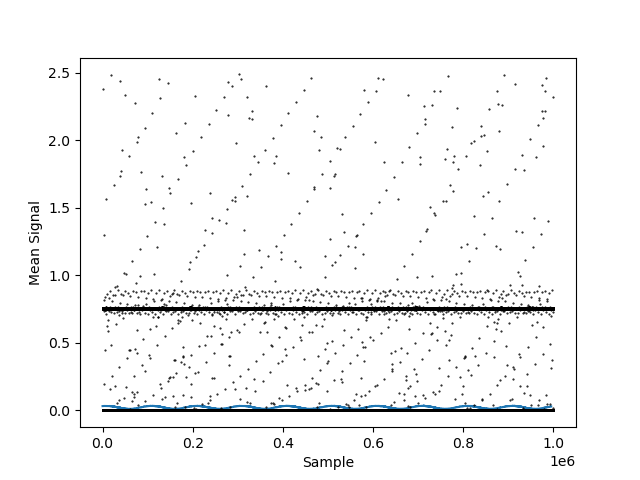

In [11]:
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import tools

## Display the data recorded
%matplotlib widget
plt.figure()
plt.xlabel('Sample')
plt.ylabel('Mean Signal')
plt.plot(tools.moving_average(DAQ_signal,int(DAQ_Rate*0.05)), "-", markersize=0.5)
plt.plot(DAQ_signal, "ko", markersize=0.5)
plt.show()

In [18]:
## Display the data recorded
%matplotlib widget
fig, ax = plt.subplots()
ax.plot(DAQ_signal, "ko", markersize=0.5)
ax.set_xlabel('Sample')
ax.set_ylabel('Mean Signal')


Text(0, 0.5, 'Mean Signal')

In [15]:
DAQ_signal

array([1.31587982, 0.        , 1.36383057, 0.        , 1.31774902,
       0.        , 1.36569977, 0.        , 1.31969452, 0.        ,
       1.36741638, 0.        , 1.32190704, 0.        , 1.36924744,
       0.        , 1.3236618 , 0.        , 1.37130737, 0.        ,
       1.3250351 , 0.        , 1.37218475, 0.        , 1.32759094,
       0.        , 1.37443542, 0.        , 1.32896423, 0.        ,
       1.3760376 , 0.        , 1.33094788, 0.        , 1.37752533,
       0.        , 1.33262634, 0.        , 1.37928009, 0.        ,
       1.33399963, 0.        , 1.38046265, 0.        , 1.33640289,
       0.        , 1.38286591, 0.        , 1.33735657, 0.        ,
       1.38389587, 0.        , 1.33960724, 0.        , 1.38572693,
       0.        , 1.34105682, 0.        , 1.38679504, 0.        ,
       1.34281158, 0.        , 1.38843536, 0.        , 1.34414673,
       0.        , 1.39011383, 0.        , 1.34571075, 0.        ,
       1.39118195, 0.        , 1.34742737, 0.        , 1.39286